In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

import pickle

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


## TensorBoard

In [3]:
log_directory = 'logs\\fit_' + datetime.datetime.now().strftime("%Y-%m-%d--%H-%M")
board = TensorBoard(log_dir=log_directory,histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1)

In [4]:
pwd

'C:\\Users\\andre\\Documents\\Github_Repositories\\ML_Models\\Supervised\\Regression\\08_Artificial_Neural_Network'

tensorboard --logdir logs\fit 

http://localhost:6006/#scalars

## Import Dataset

In [5]:
df_pen = sns.load_dataset('penguins')

In [6]:
df_pen = df_pen.dropna()

In [7]:
df_pen = df_pen.sample(frac=1).reset_index(drop=True)

In [8]:
X = df_pen.drop(['body_mass_g'], axis = 1)
y = df_pen['body_mass_g']

## Data Pre-processing

In [9]:
# categorical_x = ['species', 'island', 'sex']
# numerical_x = X.drop(categorical_x, axis = 1).columns

In [10]:
# ## If y is categorical:
# # y.fillna(y.mode(), inplace= True)
# ##If y is numerical
# y.fillna(y.mean(), inplace= True)
# for i in numerical_x:
#     X[i].fillna(X[i].mean(), inplace = True)

# for i in categorical_x:
#     X[i].fillna(X[i].mode().iloc[0], inplace = True)
    
# categoricas = pd.get_dummies(X[categorical_x], drop_first=True)
# X = pd.concat([categoricas, X[numerical_x]], axis = 1)

In [11]:
X = pd.get_dummies(X, drop_first = True)

In [12]:
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_Male
0,45.5,15.0,220.0,0,1,0,0,1
1,50.5,15.2,216.0,0,1,0,0,0
2,45.3,13.8,208.0,0,1,0,0,0
3,51.4,19.0,201.0,1,0,1,0,1
4,39.0,17.1,191.0,0,0,0,1,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

In [14]:
escalador = StandardScaler()
escalador.fit(X_train)

X_train = escalador.transform(X_train)
X_test = escalador.transform(X_test)

## Model implementation

In [15]:
X.shape

(333, 8)

In [16]:
model = Sequential()

model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse', metrics=[ 'MeanAbsoluteError', 'RootMeanSquaredError'])

In [17]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test,y_test.values),
          batch_size=32,
          epochs=400, 
          verbose = 1)

Epoch 1/400
8/8 [==============================] - 1s 26ms/step - loss: 18424752.0000 - mean_absolute_error: 4215.1772 - root_mean_squared_error: 4292.4062 - val_loss: 18159670.0000 - val_mean_absolute_error: 4187.9238 - val_root_mean_squared_error: 4261.4165
Epoch 2/400
8/8 [==============================] - 0s 4ms/step - loss: 18424498.0000 - mean_absolute_error: 4215.1489 - root_mean_squared_error: 4292.3770 - val_loss: 18159398.0000 - val_mean_absolute_error: 4187.8940 - val_root_mean_squared_error: 4261.3843
Epoch 3/400
8/8 [==============================] - 0s 5ms/step - loss: 18424200.0000 - mean_absolute_error: 4215.1177 - root_mean_squared_error: 4292.3418 - val_loss: 18159072.0000 - val_mean_absolute_error: 4187.8589 - val_root_mean_squared_error: 4261.3462
Epoch 4/400
8/8 [==============================] - 0s 5ms/step - loss: 18423840.0000 - mean_absolute_error: 4215.0796 - root_mean_squared_error: 4292.3003 - val_loss: 18158694.0000 - val_mean_absolute_error: 4187.8179 - va

8/8 [==============================] - 0s 5ms/step - loss: 18268172.0000 - mean_absolute_error: 4199.0366 - root_mean_squared_error: 4274.1284 - val_loss: 17991496.0000 - val_mean_absolute_error: 4170.2207 - val_root_mean_squared_error: 4241.6382
Epoch 33/400
8/8 [==============================] - 0s 4ms/step - loss: 18248758.0000 - mean_absolute_error: 4197.0293 - root_mean_squared_error: 4271.8564 - val_loss: 17970212.0000 - val_mean_absolute_error: 4167.9756 - val_root_mean_squared_error: 4239.1289
Epoch 34/400
8/8 [==============================] - 0s 4ms/step - loss: 18226540.0000 - mean_absolute_error: 4194.7324 - root_mean_squared_error: 4269.2554 - val_loss: 17947600.0000 - val_mean_absolute_error: 4165.5820 - val_root_mean_squared_error: 4236.4609
Epoch 35/400
8/8 [==============================] - 0s 5ms/step - loss: 18203954.0000 - mean_absolute_error: 4192.3599 - root_mean_squared_error: 4266.6094 - val_loss: 17922264.0000 - val_mean_absolute_error: 4162.9028 - val_root_mea

8/8 [==============================] - 0s 4ms/step - loss: 15983225.0000 - mean_absolute_error: 3951.0500 - root_mean_squared_error: 3997.9026 - val_loss: 15643173.0000 - val_mean_absolute_error: 3910.3267 - val_root_mean_squared_error: 3955.1450
Epoch 64/400
8/8 [==============================] - 0s 4ms/step - loss: 15831863.0000 - mean_absolute_error: 3933.6572 - root_mean_squared_error: 3978.9272 - val_loss: 15485317.0000 - val_mean_absolute_error: 3891.8706 - val_root_mean_squared_error: 3935.1387
Epoch 65/400
8/8 [==============================] - 0s 4ms/step - loss: 15670717.0000 - mean_absolute_error: 3915.0959 - root_mean_squared_error: 3958.6257 - val_loss: 15326199.0000 - val_mean_absolute_error: 3873.0974 - val_root_mean_squared_error: 3914.8689
Epoch 66/400
8/8 [==============================] - 0s 5ms/step - loss: 15510215.0000 - mean_absolute_error: 3896.2437 - root_mean_squared_error: 3938.3010 - val_loss: 15159135.0000 - val_mean_absolute_error: 3853.2168 - val_root_mea

Epoch 95/400
8/8 [==============================] - 0s 4ms/step - loss: 9141286.0000 - mean_absolute_error: 2965.8425 - root_mean_squared_error: 3023.4561 - val_loss: 8851487.0000 - val_mean_absolute_error: 2908.6748 - val_root_mean_squared_error: 2975.1448
Epoch 96/400
8/8 [==============================] - 0s 5ms/step - loss: 8923741.0000 - mean_absolute_error: 2923.2043 - root_mean_squared_error: 2987.2632 - val_loss: 8644748.0000 - val_mean_absolute_error: 2867.2769 - val_root_mean_squared_error: 2940.1953
Epoch 97/400
8/8 [==============================] - 0s 4ms/step - loss: 8713193.0000 - mean_absolute_error: 2881.3877 - root_mean_squared_error: 2951.8118 - val_loss: 8437147.0000 - val_mean_absolute_error: 2824.4434 - val_root_mean_squared_error: 2904.6768
Epoch 98/400
8/8 [==============================] - 0s 4ms/step - loss: 8502691.0000 - mean_absolute_error: 2837.8093 - root_mean_squared_error: 2915.9375 - val_loss: 8235038.0000 - val_mean_absolute_error: 2781.6731 - val_roo

Epoch 127/400
8/8 [==============================] - 0s 5ms/step - loss: 4632261.0000 - mean_absolute_error: 1818.4277 - root_mean_squared_error: 2152.2688 - val_loss: 4590538.0000 - val_mean_absolute_error: 1793.9912 - val_root_mean_squared_error: 2142.5542
Epoch 128/400
8/8 [==============================] - 0s 4ms/step - loss: 4551354.0000 - mean_absolute_error: 1800.8085 - root_mean_squared_error: 2133.3904 - val_loss: 4515034.0000 - val_mean_absolute_error: 1776.3989 - val_root_mean_squared_error: 2124.8608
Epoch 129/400
8/8 [==============================] - 0s 4ms/step - loss: 4471698.5000 - mean_absolute_error: 1783.2638 - root_mean_squared_error: 2114.6392 - val_loss: 4440957.0000 - val_mean_absolute_error: 1761.2528 - val_root_mean_squared_error: 2107.3579
Epoch 130/400
8/8 [==============================] - 0s 4ms/step - loss: 4394318.5000 - mean_absolute_error: 1767.7131 - root_mean_squared_error: 2096.2629 - val_loss: 4368702.0000 - val_mean_absolute_error: 1747.6868 - val

Epoch 159/400
8/8 [==============================] - 0s 5ms/step - loss: 2441597.0000 - mean_absolute_error: 1313.0470 - root_mean_squared_error: 1562.5610 - val_loss: 2484454.2500 - val_mean_absolute_error: 1333.5967 - val_root_mean_squared_error: 1576.2152
Epoch 160/400
8/8 [==============================] - 0s 5ms/step - loss: 2384177.2500 - mean_absolute_error: 1296.1027 - root_mean_squared_error: 1544.0781 - val_loss: 2428980.5000 - val_mean_absolute_error: 1317.9900 - val_root_mean_squared_error: 1558.5187
Epoch 161/400
8/8 [==============================] - 0s 4ms/step - loss: 2328447.2500 - mean_absolute_error: 1278.8694 - root_mean_squared_error: 1525.9250 - val_loss: 2375003.5000 - val_mean_absolute_error: 1302.0468 - val_root_mean_squared_error: 1541.1046
Epoch 162/400
8/8 [==============================] - 0s 4ms/step - loss: 2274476.2500 - mean_absolute_error: 1262.1072 - root_mean_squared_error: 1508.1367 - val_loss: 2320942.7500 - val_mean_absolute_error: 1286.3171 - val

Epoch 191/400
8/8 [==============================] - 0s 5ms/step - loss: 1080680.7500 - mean_absolute_error: 803.4353 - root_mean_squared_error: 1039.5580 - val_loss: 1110263.6250 - val_mean_absolute_error: 834.2099 - val_root_mean_squared_error: 1053.6904
Epoch 192/400
8/8 [==============================] - 0s 5ms/step - loss: 1053097.1250 - mean_absolute_error: 791.4564 - root_mean_squared_error: 1026.2052 - val_loss: 1081145.7500 - val_mean_absolute_error: 821.1156 - val_root_mean_squared_error: 1039.7816
Epoch 193/400
8/8 [==============================] - 0s 4ms/step - loss: 1025705.7500 - mean_absolute_error: 779.3179 - root_mean_squared_error: 1012.7713 - val_loss: 1054145.6250 - val_mean_absolute_error: 808.7626 - val_root_mean_squared_error: 1026.7159
Epoch 194/400
8/8 [==============================] - 0s 4ms/step - loss: 1000211.0000 - mean_absolute_error: 767.8479 - root_mean_squared_error: 1000.1055 - val_loss: 1027421.6250 - val_mean_absolute_error: 797.2683 - val_root_me

8/8 [==============================] - 0s 4ms/step - loss: 529559.8125 - mean_absolute_error: 544.9743 - root_mean_squared_error: 727.7086 - val_loss: 520621.4688 - val_mean_absolute_error: 550.5780 - val_root_mean_squared_error: 721.5410
Epoch 224/400
8/8 [==============================] - 0s 4ms/step - loss: 520875.2188 - mean_absolute_error: 540.5438 - root_mean_squared_error: 721.7169 - val_loss: 510434.3125 - val_mean_absolute_error: 545.0133 - val_root_mean_squared_error: 714.4468
Epoch 225/400
8/8 [==============================] - 0s 5ms/step - loss: 511947.9688 - mean_absolute_error: 536.3473 - root_mean_squared_error: 715.5054 - val_loss: 500892.0312 - val_mean_absolute_error: 539.9282 - val_root_mean_squared_error: 707.7372
Epoch 226/400
8/8 [==============================] - 0s 5ms/step - loss: 503688.7812 - mean_absolute_error: 532.0552 - root_mean_squared_error: 709.7103 - val_loss: 491803.5938 - val_mean_absolute_error: 535.1349 - val_root_mean_squared_error: 701.2871
Ep

8/8 [==============================] - 0s 4ms/step - loss: 338577.9688 - mean_absolute_error: 447.8622 - root_mean_squared_error: 581.8745 - val_loss: 316458.0938 - val_mean_absolute_error: 432.1902 - val_root_mean_squared_error: 562.5461
Epoch 256/400
8/8 [==============================] - 0s 5ms/step - loss: 334607.8750 - mean_absolute_error: 445.5077 - root_mean_squared_error: 578.4530 - val_loss: 312281.6562 - val_mean_absolute_error: 429.5509 - val_root_mean_squared_error: 558.8217
Epoch 257/400
8/8 [==============================] - 0s 5ms/step - loss: 330643.5000 - mean_absolute_error: 443.3655 - root_mean_squared_error: 575.0161 - val_loss: 308726.5312 - val_mean_absolute_error: 427.1479 - val_root_mean_squared_error: 555.6317
Epoch 258/400
8/8 [==============================] - 0s 5ms/step - loss: 326857.8438 - mean_absolute_error: 441.1870 - root_mean_squared_error: 571.7148 - val_loss: 304735.6250 - val_mean_absolute_error: 424.6404 - val_root_mean_squared_error: 552.0286
Ep

8/8 [==============================] - 0s 5ms/step - loss: 253440.6719 - mean_absolute_error: 396.5481 - root_mean_squared_error: 503.4289 - val_loss: 237578.4219 - val_mean_absolute_error: 376.3098 - val_root_mean_squared_error: 487.4202
Epoch 288/400
8/8 [==============================] - 0s 4ms/step - loss: 251713.8438 - mean_absolute_error: 395.4169 - root_mean_squared_error: 501.7109 - val_loss: 236128.7031 - val_mean_absolute_error: 375.0982 - val_root_mean_squared_error: 485.9308
Epoch 289/400
8/8 [==============================] - 0s 5ms/step - loss: 250283.1719 - mean_absolute_error: 394.5934 - root_mean_squared_error: 500.2831 - val_loss: 234799.5156 - val_mean_absolute_error: 374.0274 - val_root_mean_squared_error: 484.5612
Epoch 290/400
8/8 [==============================] - 0s 5ms/step - loss: 248522.1406 - mean_absolute_error: 393.2647 - root_mean_squared_error: 498.5200 - val_loss: 233581.7031 - val_mean_absolute_error: 372.9503 - val_root_mean_squared_error: 483.3029
Ep

8/8 [==============================] - 0s 5ms/step - loss: 215500.6719 - mean_absolute_error: 368.7530 - root_mean_squared_error: 464.2205 - val_loss: 210735.3438 - val_mean_absolute_error: 351.0102 - val_root_mean_squared_error: 459.0592
Epoch 320/400
8/8 [==============================] - 0s 5ms/step - loss: 214686.1562 - mean_absolute_error: 368.1757 - root_mean_squared_error: 463.3424 - val_loss: 210270.5938 - val_mean_absolute_error: 350.6883 - val_root_mean_squared_error: 458.5527
Epoch 321/400
8/8 [==============================] - 0s 4ms/step - loss: 213941.9531 - mean_absolute_error: 367.7070 - root_mean_squared_error: 462.5386 - val_loss: 209756.7812 - val_mean_absolute_error: 350.2953 - val_root_mean_squared_error: 457.9921
Epoch 322/400
8/8 [==============================] - 0s 4ms/step - loss: 213230.0781 - mean_absolute_error: 367.1078 - root_mean_squared_error: 461.7684 - val_loss: 209857.2812 - val_mean_absolute_error: 350.5127 - val_root_mean_squared_error: 458.1018
Ep

8/8 [==============================] - 0s 5ms/step - loss: 196153.3906 - mean_absolute_error: 352.0951 - root_mean_squared_error: 442.8921 - val_loss: 200429.4062 - val_mean_absolute_error: 346.3096 - val_root_mean_squared_error: 447.6934
Epoch 352/400
8/8 [==============================] - 0s 5ms/step - loss: 195748.5469 - mean_absolute_error: 351.8454 - root_mean_squared_error: 442.4348 - val_loss: 200106.4219 - val_mean_absolute_error: 346.2271 - val_root_mean_squared_error: 447.3326
Epoch 353/400
8/8 [==============================] - 0s 4ms/step - loss: 195212.8125 - mean_absolute_error: 351.3727 - root_mean_squared_error: 441.8289 - val_loss: 199954.8594 - val_mean_absolute_error: 346.2679 - val_root_mean_squared_error: 447.1631
Epoch 354/400
8/8 [==============================] - 0s 5ms/step - loss: 194792.7969 - mean_absolute_error: 351.0219 - root_mean_squared_error: 441.3534 - val_loss: 199451.1875 - val_mean_absolute_error: 345.8948 - val_root_mean_squared_error: 446.5996
Ep

8/8 [==============================] - 0s 5ms/step - loss: 184221.9062 - mean_absolute_error: 342.7868 - root_mean_squared_error: 429.2108 - val_loss: 192906.9375 - val_mean_absolute_error: 343.3335 - val_root_mean_squared_error: 439.2117
Epoch 384/400
8/8 [==============================] - 0s 4ms/step - loss: 183900.2188 - mean_absolute_error: 342.4227 - root_mean_squared_error: 428.8359 - val_loss: 192709.1406 - val_mean_absolute_error: 343.2269 - val_root_mean_squared_error: 438.9865
Epoch 385/400
8/8 [==============================] - 0s 4ms/step - loss: 183612.8281 - mean_absolute_error: 342.1931 - root_mean_squared_error: 428.5007 - val_loss: 192548.2188 - val_mean_absolute_error: 343.2599 - val_root_mean_squared_error: 438.8032
Epoch 386/400
8/8 [==============================] - 0s 4ms/step - loss: 183355.8906 - mean_absolute_error: 342.0091 - root_mean_squared_error: 428.2007 - val_loss: 192150.5000 - val_mean_absolute_error: 342.9905 - val_root_mean_squared_error: 438.3497
Ep

## Evaluation

In [18]:
model.history.history

{'loss': [18424752.0,
  18424498.0,
  18424200.0,
  18423840.0,
  18423424.0,
  18422952.0,
  18422386.0,
  18421746.0,
  18421000.0,
  18420096.0,
  18419002.0,
  18417770.0,
  18416238.0,
  18414506.0,
  18412398.0,
  18409972.0,
  18407080.0,
  18403754.0,
  18399906.0,
  18395616.0,
  18390474.0,
  18384620.0,
  18378116.0,
  18370522.0,
  18362326.0,
  18352520.0,
  18341960.0,
  18330024.0,
  18317230.0,
  18302280.0,
  18286404.0,
  18268172.0,
  18248758.0,
  18226540.0,
  18203954.0,
  18176902.0,
  18149530.0,
  18117770.0,
  18083258.0,
  18045500.0,
  18004420.0,
  17962232.0,
  17914116.0,
  17863372.0,
  17808740.0,
  17748728.0,
  17685542.0,
  17619874.0,
  17547908.0,
  17472032.0,
  17390876.0,
  17300178.0,
  17207984.0,
  17109692.0,
  17008224.0,
  16896988.0,
  16787192.0,
  16669527.0,
  16543347.0,
  16411494.0,
  16276446.0,
  16134298.0,
  15983225.0,
  15831863.0,
  15670717.0,
  15510215.0,
  15335833.0,
  15159240.0,
  14977402.0,
  14786745.0,
  14591077.0

<Axes: >

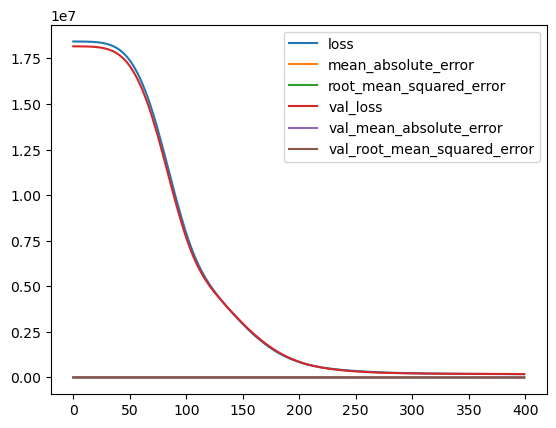

In [19]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [20]:
# loss = model.history.history['loss']
# sns.lineplot(x=range(len(loss)),y=loss)
# plt.title("Training Loss per Epoch");

In [21]:
model.metrics_names

['loss', 'mean_absolute_error', 'root_mean_squared_error']

In [22]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [23]:
training_score

[178978.546875, 338.5434265136719, 423.0585632324219]

In [24]:
test_score

[187879.3125, 339.986083984375, 433.4504699707031]

In [25]:
test_predictions = model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(test_predictions.shape[0],))

4/4 [==============================] - 0s 1ms/step


In [26]:
test_predictions

0     5198.224609
1     5658.072754
2     3452.162598
3     5678.720703
4     3947.851562
         ...     
95    3187.114746
96    3599.406250
97    3479.459961
98    3901.411377
99    4439.572266
Length: 100, dtype: float32

In [27]:
pred_df = pd.DataFrame(y_test).reset_index(drop = True)
pred_df['Model_Predictions'] = test_predictions
pred_df.columns = ['Test_Y','Model_Predictions']

In [28]:
pred_df

,Test_Y,Model_Predictions
0,5100.0,5198.224609
1,5700.0,5658.072754
2,3475.0,3452.162598
3,5400.0,5678.720703
4,4050.0,3947.851562
...,...,...
95,3000.0,3187.114746
96,3150.0,3599.406250
97,3500.0,3479.459961
98,3900.0,3901.411377


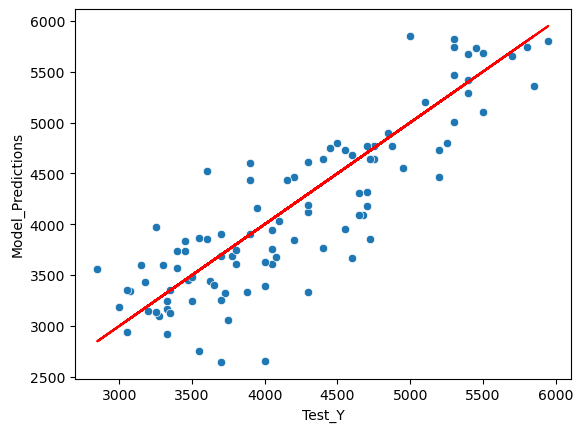

In [29]:
sns.scatterplot(x='Test_Y',y='Model_Predictions',data=pred_df)
plt.plot(y_test,y_test,'r')

In [30]:
pred_df['Error'] = pred_df['Test_Y'] - pred_df['Model_Predictions']

C:\Users\andre\AppData\Local\Temp\ipykernel_2104\1928191693.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_df['Error'],bins=50);


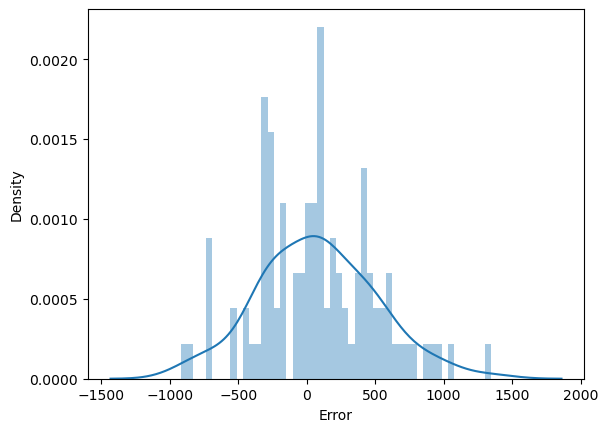

In [31]:
sns.distplot(pred_df['Error'],bins=50);

In [32]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(pred_df["Test_Y"],pred_df["Model_Predictions"])}')
print(f'Mean Squared Error: {metrics.mean_squared_error(pred_df["Test_Y"],pred_df["Model_Predictions"])}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(pred_df["Test_Y"],pred_df["Model_Predictions"]))}')

Mean Absolute Error: 339.98612548828123
Mean Squared Error: 187879.32223185123
Root Mean Squared Error: 433.4504841753568


In [33]:
np.sqrt(metrics.mean_squared_error(pred_df["Test_Y"],pred_df["Model_Predictions"]))/pred_df["Test_Y"].mean()

0.10349820539048633

In [34]:
metrics.explained_variance_score(pred_df["Test_Y"],pred_df["Model_Predictions"])

0.706853262187503

## Early Stopping

In [35]:
model = Sequential()

model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse', metrics=[ 'MeanAbsoluteError', 'RootMeanSquaredError'])

In [36]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [37]:
model.fit(x=X_train,y=y_train, 
          validation_data=(X_test,y_test.values), 
          batch_size=32,
          epochs=400, 
          verbose = 1, 
          callbacks=[early_stop, board])

Epoch 1/400
8/8 [==============================] - 1s 50ms/step - loss: 18428992.0000 - mean_absolute_error: 4215.6509 - root_mean_squared_error: 4292.9004 - val_loss: 18163590.0000 - val_mean_absolute_error: 4188.3599 - val_root_mean_squared_error: 4261.8765
Epoch 2/400
8/8 [==============================] - 0s 19ms/step - loss: 18428102.0000 - mean_absolute_error: 4215.5498 - root_mean_squared_error: 4292.7964 - val_loss: 18162764.0000 - val_mean_absolute_error: 4188.2661 - val_root_mean_squared_error: 4261.7793
Epoch 3/400
8/8 [==============================] - 0s 18ms/step - loss: 18427296.0000 - mean_absolute_error: 4215.4585 - root_mean_squared_error: 4292.7026 - val_loss: 18162040.0000 - val_mean_absolute_error: 4188.1846 - val_root_mean_squared_error: 4261.6943
Epoch 4/400
8/8 [==============================] - 0s 18ms/step - loss: 18426586.0000 - mean_absolute_error: 4215.3774 - root_mean_squared_error: 4292.6201 - val_loss: 18161410.0000 - val_mean_absolute_error: 4188.1133 -

8/8 [==============================] - 0s 18ms/step - loss: 18394694.0000 - mean_absolute_error: 4211.4395 - root_mean_squared_error: 4288.9038 - val_loss: 18128506.0000 - val_mean_absolute_error: 4184.0332 - val_root_mean_squared_error: 4257.7583
Epoch 33/400
8/8 [==============================] - 0s 19ms/step - loss: 18390634.0000 - mean_absolute_error: 4210.9312 - root_mean_squared_error: 4288.4302 - val_loss: 18124168.0000 - val_mean_absolute_error: 4183.4902 - val_root_mean_squared_error: 4257.2490
Epoch 34/400
8/8 [==============================] - 0s 19ms/step - loss: 18386056.0000 - mean_absolute_error: 4210.3677 - root_mean_squared_error: 4287.8965 - val_loss: 18119386.0000 - val_mean_absolute_error: 4182.8901 - val_root_mean_squared_error: 4256.6870
Epoch 35/400
8/8 [==============================] - 0s 18ms/step - loss: 18380988.0000 - mean_absolute_error: 4209.7368 - root_mean_squared_error: 4287.3057 - val_loss: 18114028.0000 - val_mean_absolute_error: 4182.2207 - val_root

8/8 [==============================] - 0s 20ms/step - loss: 17764026.0000 - mean_absolute_error: 4132.9736 - root_mean_squared_error: 4214.7393 - val_loss: 17481580.0000 - val_mean_absolute_error: 4102.9150 - val_root_mean_squared_error: 4181.0981
Epoch 64/400
8/8 [==============================] - 0s 19ms/step - loss: 17715254.0000 - mean_absolute_error: 4126.8472 - root_mean_squared_error: 4208.9492 - val_loss: 17432396.0000 - val_mean_absolute_error: 4096.7085 - val_root_mean_squared_error: 4175.2119
Epoch 65/400
8/8 [==============================] - 0s 20ms/step - loss: 17664150.0000 - mean_absolute_error: 4120.4067 - root_mean_squared_error: 4202.8740 - val_loss: 17380594.0000 - val_mean_absolute_error: 4090.1748 - val_root_mean_squared_error: 4169.0039
Epoch 66/400
8/8 [==============================] - 0s 19ms/step - loss: 17610542.0000 - mean_absolute_error: 4113.6484 - root_mean_squared_error: 4196.4917 - val_loss: 17326160.0000 - val_mean_absolute_error: 4083.2981 - val_root

8/8 [==============================] - 0s 17ms/step - loss: 14867273.0000 - mean_absolute_error: 3749.8181 - root_mean_squared_error: 3855.8103 - val_loss: 14601018.0000 - val_mean_absolute_error: 3719.3899 - val_root_mean_squared_error: 3821.1279
Epoch 95/400
8/8 [==============================] - 0s 18ms/step - loss: 14718238.0000 - mean_absolute_error: 3728.7170 - root_mean_squared_error: 3836.4355 - val_loss: 14453878.0000 - val_mean_absolute_error: 3698.6438 - val_root_mean_squared_error: 3801.8257
Epoch 96/400
8/8 [==============================] - 0s 18ms/step - loss: 14566078.0000 - mean_absolute_error: 3707.2383 - root_mean_squared_error: 3816.5532 - val_loss: 14303430.0000 - val_mean_absolute_error: 3677.2734 - val_root_mean_squared_error: 3781.9875
Epoch 97/400
8/8 [==============================] - 0s 18ms/step - loss: 14409744.0000 - mean_absolute_error: 3685.1404 - root_mean_squared_error: 3796.0168 - val_loss: 14150988.0000 - val_mean_absolute_error: 3655.4419 - val_root

8/8 [==============================] - 0s 18ms/step - loss: 9062260.0000 - mean_absolute_error: 2807.1731 - root_mean_squared_error: 3010.3589 - val_loss: 8928088.0000 - val_mean_absolute_error: 2799.3965 - val_root_mean_squared_error: 2987.9907
Epoch 126/400
8/8 [==============================] - 0s 17ms/step - loss: 8855384.0000 - mean_absolute_error: 2767.6062 - root_mean_squared_error: 2975.7998 - val_loss: 8727296.0000 - val_mean_absolute_error: 2761.2969 - val_root_mean_squared_error: 2954.1997
Epoch 127/400
8/8 [==============================] - 0s 18ms/step - loss: 8649492.0000 - mean_absolute_error: 2727.6309 - root_mean_squared_error: 2941.0020 - val_loss: 8525975.0000 - val_mean_absolute_error: 2722.7158 - val_root_mean_squared_error: 2919.9272
Epoch 128/400
8/8 [==============================] - 0s 18ms/step - loss: 8446597.0000 - mean_absolute_error: 2686.5859 - root_mean_squared_error: 2906.3030 - val_loss: 8324295.5000 - val_mean_absolute_error: 2683.6221 - val_root_mean

8/8 [==============================] - 0s 18ms/step - loss: 3589851.5000 - mean_absolute_error: 1559.3654 - root_mean_squared_error: 1894.6903 - val_loss: 3570584.7500 - val_mean_absolute_error: 1571.9172 - val_root_mean_squared_error: 1889.5991
Epoch 157/400
8/8 [==============================] - 0s 18ms/step - loss: 3466719.5000 - mean_absolute_error: 1527.8170 - root_mean_squared_error: 1861.9128 - val_loss: 3444513.2500 - val_mean_absolute_error: 1538.9403 - val_root_mean_squared_error: 1855.9399
Epoch 158/400
8/8 [==============================] - 0s 18ms/step - loss: 3341276.7500 - mean_absolute_error: 1495.2313 - root_mean_squared_error: 1827.9160 - val_loss: 3322463.0000 - val_mean_absolute_error: 1506.4886 - val_root_mean_squared_error: 1822.7625
Epoch 159/400
8/8 [==============================] - 0s 17ms/step - loss: 3222746.2500 - mean_absolute_error: 1465.0083 - root_mean_squared_error: 1795.2009 - val_loss: 3204155.7500 - val_mean_absolute_error: 1475.6631 - val_root_mean

Epoch 188/400
8/8 [==============================] - 0s 19ms/step - loss: 1086295.5000 - mean_absolute_error: 861.2021 - root_mean_squared_error: 1042.2550 - val_loss: 1079094.5000 - val_mean_absolute_error: 859.8909 - val_root_mean_squared_error: 1038.7947
Epoch 189/400
8/8 [==============================] - 0s 19ms/step - loss: 1048544.5000 - mean_absolute_error: 847.1371 - root_mean_squared_error: 1023.9846 - val_loss: 1041530.5625 - val_mean_absolute_error: 844.3373 - val_root_mean_squared_error: 1020.5541
Epoch 190/400
8/8 [==============================] - 0s 19ms/step - loss: 1011949.0625 - mean_absolute_error: 832.7100 - root_mean_squared_error: 1005.9568 - val_loss: 1007852.9375 - val_mean_absolute_error: 829.8982 - val_root_mean_squared_error: 1003.9188
Epoch 191/400
8/8 [==============================] - 0s 19ms/step - loss: 977197.7500 - mean_absolute_error: 818.9808 - root_mean_squared_error: 988.5331 - val_loss: 976493.3750 - val_mean_absolute_error: 815.9944 - val_root_m

8/8 [==============================] - 0s 18ms/step - loss: 458227.7812 - mean_absolute_error: 549.2059 - root_mean_squared_error: 676.9252 - val_loss: 499962.8125 - val_mean_absolute_error: 562.4031 - val_root_mean_squared_error: 707.0805
Epoch 221/400
8/8 [==============================] - 0s 19ms/step - loss: 450101.1562 - mean_absolute_error: 543.3718 - root_mean_squared_error: 670.8958 - val_loss: 493612.6875 - val_mean_absolute_error: 559.6755 - val_root_mean_squared_error: 702.5757
Epoch 222/400
8/8 [==============================] - 0s 19ms/step - loss: 443294.2812 - mean_absolute_error: 538.5972 - root_mean_squared_error: 665.8035 - val_loss: 487869.4375 - val_mean_absolute_error: 557.0693 - val_root_mean_squared_error: 698.4765
Epoch 223/400
8/8 [==============================] - 0s 18ms/step - loss: 436429.3750 - mean_absolute_error: 533.7792 - root_mean_squared_error: 660.6280 - val_loss: 482201.3125 - val_mean_absolute_error: 554.5117 - val_root_mean_squared_error: 694.407

8/8 [==============================] - 0s 18ms/step - loss: 339726.5312 - mean_absolute_error: 459.1502 - root_mean_squared_error: 582.8607 - val_loss: 405166.7188 - val_mean_absolute_error: 513.3401 - val_root_mean_squared_error: 636.5271
Epoch 253/400
8/8 [==============================] - 0s 18ms/step - loss: 338063.5000 - mean_absolute_error: 457.8476 - root_mean_squared_error: 581.4323 - val_loss: 404299.8125 - val_mean_absolute_error: 512.4902 - val_root_mean_squared_error: 635.8458
Epoch 254/400
8/8 [==============================] - 0s 18ms/step - loss: 336684.9062 - mean_absolute_error: 456.8761 - root_mean_squared_error: 580.2455 - val_loss: 402307.6250 - val_mean_absolute_error: 511.1945 - val_root_mean_squared_error: 634.2772
Epoch 255/400
8/8 [==============================] - 0s 19ms/step - loss: 335041.3438 - mean_absolute_error: 455.4847 - root_mean_squared_error: 578.8276 - val_loss: 401134.8125 - val_mean_absolute_error: 510.2051 - val_root_mean_squared_error: 633.352

8/8 [==============================] - 0s 18ms/step - loss: 303986.7812 - mean_absolute_error: 435.2332 - root_mean_squared_error: 551.3500 - val_loss: 371479.2500 - val_mean_absolute_error: 488.4374 - val_root_mean_squared_error: 609.4910
Epoch 285/400
8/8 [==============================] - 0s 18ms/step - loss: 303081.1562 - mean_absolute_error: 434.7846 - root_mean_squared_error: 550.5281 - val_loss: 369972.8750 - val_mean_absolute_error: 487.5151 - val_root_mean_squared_error: 608.2540
Epoch 286/400
8/8 [==============================] - 0s 18ms/step - loss: 302118.8438 - mean_absolute_error: 434.0821 - root_mean_squared_error: 549.6534 - val_loss: 368977.1875 - val_mean_absolute_error: 486.8257 - val_root_mean_squared_error: 607.4349
Epoch 287/400
8/8 [==============================] - 0s 18ms/step - loss: 301213.8125 - mean_absolute_error: 433.5425 - root_mean_squared_error: 548.8295 - val_loss: 367822.4688 - val_mean_absolute_error: 486.0794 - val_root_mean_squared_error: 606.483

8/8 [==============================] - 0s 19ms/step - loss: 278458.4688 - mean_absolute_error: 417.8529 - root_mean_squared_error: 527.6917 - val_loss: 337608.3125 - val_mean_absolute_error: 466.4185 - val_root_mean_squared_error: 581.0407
Epoch 317/400
8/8 [==============================] - 0s 19ms/step - loss: 277781.7188 - mean_absolute_error: 417.5085 - root_mean_squared_error: 527.0500 - val_loss: 336483.0000 - val_mean_absolute_error: 465.6923 - val_root_mean_squared_error: 580.0715
Epoch 318/400
8/8 [==============================] - 0s 20ms/step - loss: 277136.2188 - mean_absolute_error: 417.0967 - root_mean_squared_error: 526.4373 - val_loss: 335727.4688 - val_mean_absolute_error: 465.1416 - val_root_mean_squared_error: 579.4199
Epoch 319/400
8/8 [==============================] - 0s 20ms/step - loss: 276423.9375 - mean_absolute_error: 416.6122 - root_mean_squared_error: 525.7603 - val_loss: 335282.1875 - val_mean_absolute_error: 464.6989 - val_root_mean_squared_error: 579.035

8/8 [==============================] - 0s 18ms/step - loss: 257698.5625 - mean_absolute_error: 404.3178 - root_mean_squared_error: 507.6402 - val_loss: 310122.0938 - val_mean_absolute_error: 447.0444 - val_root_mean_squared_error: 556.8860
Epoch 349/400
8/8 [==============================] - 0s 18ms/step - loss: 257104.7188 - mean_absolute_error: 404.0142 - root_mean_squared_error: 507.0549 - val_loss: 308755.1562 - val_mean_absolute_error: 446.2053 - val_root_mean_squared_error: 555.6574
Epoch 350/400
8/8 [==============================] - 0s 18ms/step - loss: 256487.5469 - mean_absolute_error: 403.6571 - root_mean_squared_error: 506.4460 - val_loss: 307526.8125 - val_mean_absolute_error: 445.4880 - val_root_mean_squared_error: 554.5510
Epoch 351/400
8/8 [==============================] - 0s 17ms/step - loss: 255905.6875 - mean_absolute_error: 403.3675 - root_mean_squared_error: 505.8712 - val_loss: 306739.6250 - val_mean_absolute_error: 444.9384 - val_root_mean_squared_error: 553.840

8/8 [==============================] - 0s 18ms/step - loss: 239838.1875 - mean_absolute_error: 391.6656 - root_mean_squared_error: 489.7328 - val_loss: 283393.3750 - val_mean_absolute_error: 427.2297 - val_root_mean_squared_error: 532.3470
Epoch 381/400
8/8 [==============================] - 0s 18ms/step - loss: 239362.9844 - mean_absolute_error: 391.3025 - root_mean_squared_error: 489.2474 - val_loss: 282564.0938 - val_mean_absolute_error: 426.5940 - val_root_mean_squared_error: 531.5676
Epoch 382/400
8/8 [==============================] - 0s 18ms/step - loss: 238799.8750 - mean_absolute_error: 390.8329 - root_mean_squared_error: 488.6715 - val_loss: 281822.0938 - val_mean_absolute_error: 426.0725 - val_root_mean_squared_error: 530.8692
Epoch 383/400
8/8 [==============================] - 0s 18ms/step - loss: 238234.2812 - mean_absolute_error: 390.3345 - root_mean_squared_error: 488.0925 - val_loss: 281046.3125 - val_mean_absolute_error: 425.4713 - val_root_mean_squared_error: 530.138

## Evaluation

In [38]:
model.history.history

{'loss': [18428992.0,
  18428102.0,
  18427296.0,
  18426586.0,
  18425982.0,
  18425506.0,
  18425134.0,
  18424814.0,
  18424536.0,
  18424268.0,
  18423992.0,
  18423712.0,
  18423402.0,
  18423068.0,
  18422680.0,
  18422230.0,
  18421692.0,
  18421066.0,
  18420338.0,
  18419524.0,
  18418602.0,
  18417554.0,
  18416330.0,
  18414888.0,
  18413240.0,
  18411376.0,
  18409286.0,
  18406950.0,
  18404372.0,
  18401514.0,
  18398304.0,
  18394694.0,
  18390634.0,
  18386056.0,
  18380988.0,
  18375404.0,
  18369126.0,
  18362204.0,
  18354570.0,
  18346090.0,
  18336818.0,
  18326518.0,
  18315278.0,
  18302928.0,
  18289448.0,
  18274758.0,
  18258868.0,
  18241786.0,
  18222912.0,
  18202620.0,
  18180414.0,
  18156716.0,
  18130882.0,
  18103524.0,
  18073950.0,
  18042710.0,
  18009032.0,
  17973790.0,
  17936008.0,
  17896572.0,
  17854774.0,
  17810450.0,
  17764026.0,
  17715254.0,
  17664150.0,
  17610542.0,
  17553672.0,
  17494670.0,
  17432980.0,
  17368270.0,
  17300830.0

<Axes: >

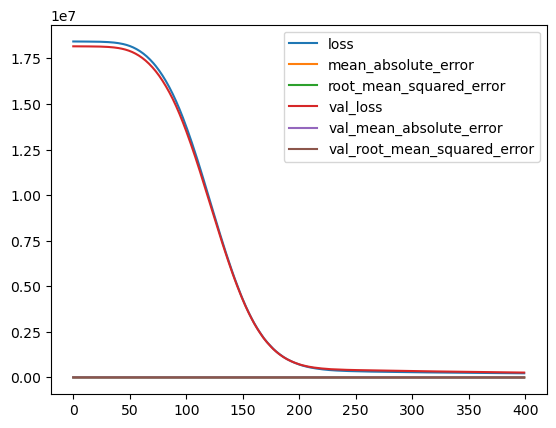

In [39]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [40]:
# loss = model.history.history['loss']
# sns.lineplot(x=range(len(loss)),y=loss)
# plt.title("Training Loss per Epoch");

In [41]:
model.metrics_names

['loss', 'mean_absolute_error', 'root_mean_squared_error']

In [42]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [43]:
training_score

[229661.640625, 384.0001525878906, 479.2302551269531]

In [44]:
test_score

[268610.875, 416.4665222167969, 518.27685546875]

In [45]:
test_predictions = model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(test_predictions.shape[0],))

4/4 [==============================] - 0s 1ms/step


In [46]:
test_predictions

0     5143.170898
1     5361.738770
2     3472.167480
3     5350.528809
4     4144.386230
         ...     
95    3376.925781
96    3243.201416
97    3704.125977
98    4268.239258
99    4668.436035
Length: 100, dtype: float32

In [47]:
pred_df = pd.DataFrame(y_test).reset_index(drop = True)
pred_df['Model_Predictions'] = test_predictions
pred_df.columns = ['Test_Y','Model_Predictions']

In [48]:
pred_df

,Test_Y,Model_Predictions
0,5100.0,5143.170898
1,5700.0,5361.738770
2,3475.0,3472.167480
3,5400.0,5350.528809
4,4050.0,4144.386230
...,...,...
95,3000.0,3376.925781
96,3150.0,3243.201416
97,3500.0,3704.125977
98,3900.0,4268.239258


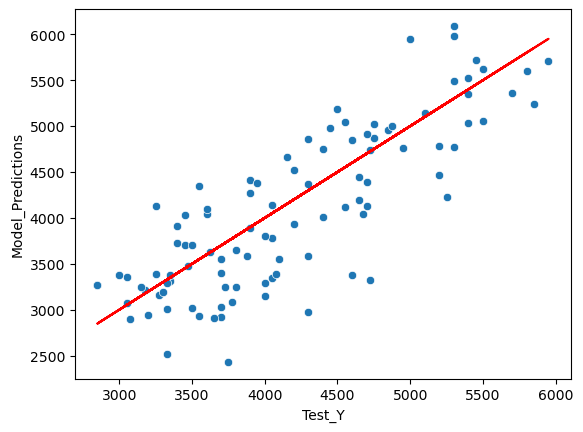

In [49]:
sns.scatterplot(x='Test_Y',y='Model_Predictions',data=pred_df)
plt.plot(y_test,y_test,'r')

In [50]:
pred_df['Error'] = pred_df['Test_Y'] - pred_df['Model_Predictions']

C:\Users\andre\AppData\Local\Temp\ipykernel_2104\1928191693.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_df['Error'],bins=50);


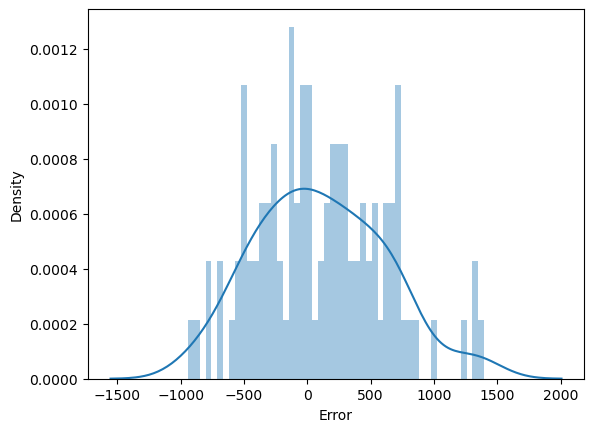

In [51]:
sns.distplot(pred_df['Error'],bins=50);

In [52]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(pred_df["Test_Y"],pred_df["Model_Predictions"])}')
print(f'Mean Squared Error: {metrics.mean_squared_error(pred_df["Test_Y"],pred_df["Model_Predictions"])}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(pred_df["Test_Y"],pred_df["Model_Predictions"]))}')

Mean Absolute Error: 416.4665380859375
Mean Squared Error: 268610.88128519536
Root Mean Squared Error: 518.2768384610636


In [53]:
np.sqrt(metrics.mean_squared_error(pred_df["Test_Y"],pred_df["Model_Predictions"]))/pred_df["Test_Y"].mean()

0.12375282675765606

In [54]:
metrics.explained_variance_score(pred_df["Test_Y"],pred_df["Model_Predictions"])

0.5854890126182013

## Adding in DropOut Layers

In [55]:
model = Sequential()

model.add(Dense(8,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4,activation='relu'))
model.add(Dropout(0.5))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse', metrics=[ 'MeanAbsoluteError', 'RootMeanSquaredError'])

In [56]:
model.fit(x=X_train,
          y=y_train, 
          validation_data=(X_test,y_test.values), 
          batch_size=32,
          epochs=400, 
          verbose = 1, 
          callbacks=[early_stop])

Epoch 1/400
8/8 [==============================] - 1s 19ms/step - loss: 18427880.0000 - mean_absolute_error: 4215.5942 - root_mean_squared_error: 4292.7705 - val_loss: 18161200.0000 - val_mean_absolute_error: 4188.1328 - val_root_mean_squared_error: 4261.5957
Epoch 2/400
8/8 [==============================] - 0s 5ms/step - loss: 18425518.0000 - mean_absolute_error: 4215.2803 - root_mean_squared_error: 4292.4956 - val_loss: 18160664.0000 - val_mean_absolute_error: 4188.0674 - val_root_mean_squared_error: 4261.5332
Epoch 3/400
8/8 [==============================] - 0s 4ms/step - loss: 18426048.0000 - mean_absolute_error: 4215.3604 - root_mean_squared_error: 4292.5571 - val_loss: 18160152.0000 - val_mean_absolute_error: 4188.0049 - val_root_mean_squared_error: 4261.4731
Epoch 4/400
8/8 [==============================] - 0s 4ms/step - loss: 18425204.0000 - mean_absolute_error: 4215.2754 - root_mean_squared_error: 4292.4590 - val_loss: 18159624.0000 - val_mean_absolute_error: 4187.9419 - va

8/8 [==============================] - 0s 5ms/step - loss: 18365422.0000 - mean_absolute_error: 4208.4580 - root_mean_squared_error: 4285.4897 - val_loss: 18104548.0000 - val_mean_absolute_error: 4181.8467 - val_root_mean_squared_error: 4254.9438
Epoch 33/400
8/8 [==============================] - 0s 4ms/step - loss: 18358334.0000 - mean_absolute_error: 4207.9346 - root_mean_squared_error: 4284.6626 - val_loss: 18097720.0000 - val_mean_absolute_error: 4181.1001 - val_root_mean_squared_error: 4254.1416
Epoch 34/400
8/8 [==============================] - 0s 5ms/step - loss: 18351496.0000 - mean_absolute_error: 4207.3066 - root_mean_squared_error: 4283.8647 - val_loss: 18090314.0000 - val_mean_absolute_error: 4180.2925 - val_root_mean_squared_error: 4253.2710
Epoch 35/400
8/8 [==============================] - 0s 4ms/step - loss: 18355824.0000 - mean_absolute_error: 4207.5322 - root_mean_squared_error: 4284.3696 - val_loss: 18082476.0000 - val_mean_absolute_error: 4179.4341 - val_root_mea

8/8 [==============================] - 0s 5ms/step - loss: 17420650.0000 - mean_absolute_error: 4099.0342 - root_mean_squared_error: 4173.8052 - val_loss: 17083636.0000 - val_mean_absolute_error: 4066.8887 - val_root_mean_squared_error: 4133.2354
Epoch 64/400
8/8 [==============================] - 0s 5ms/step - loss: 17294202.0000 - mean_absolute_error: 4086.8999 - root_mean_squared_error: 4158.6299 - val_loss: 17002780.0000 - val_mean_absolute_error: 4057.5134 - val_root_mean_squared_error: 4123.4429
Epoch 65/400
8/8 [==============================] - 0s 5ms/step - loss: 17096264.0000 - mean_absolute_error: 4061.9163 - root_mean_squared_error: 4134.7627 - val_loss: 16910536.0000 - val_mean_absolute_error: 4046.7878 - val_root_mean_squared_error: 4112.2422
Epoch 66/400
8/8 [==============================] - 0s 5ms/step - loss: 16888720.0000 - mean_absolute_error: 4037.7097 - root_mean_squared_error: 4109.5889 - val_loss: 16810722.0000 - val_mean_absolute_error: 4035.0781 - val_root_mea

8/8 [==============================] - 0s 5ms/step - loss: 13005081.0000 - mean_absolute_error: 3433.9109 - root_mean_squared_error: 3606.2559 - val_loss: 12270799.0000 - val_mean_absolute_error: 3454.7659 - val_root_mean_squared_error: 3502.9700
Epoch 95/400
8/8 [==============================] - 0s 4ms/step - loss: 13288547.0000 - mean_absolute_error: 3483.5686 - root_mean_squared_error: 3645.3459 - val_loss: 12055452.0000 - val_mean_absolute_error: 3424.4329 - val_root_mean_squared_error: 3472.0962
Epoch 96/400
8/8 [==============================] - 0s 5ms/step - loss: 13176861.0000 - mean_absolute_error: 3434.9604 - root_mean_squared_error: 3629.9946 - val_loss: 11857139.0000 - val_mean_absolute_error: 3396.1672 - val_root_mean_squared_error: 3443.4197
Epoch 97/400
8/8 [==============================] - 0s 5ms/step - loss: 12154469.0000 - mean_absolute_error: 3314.0945 - root_mean_squared_error: 3486.3259 - val_loss: 11652556.0000 - val_mean_absolute_error: 3366.7512 - val_root_mea

8/8 [==============================] - 0s 4ms/step - loss: 9906734.0000 - mean_absolute_error: 2831.2822 - root_mean_squared_error: 3147.4966 - val_loss: 7106664.5000 - val_mean_absolute_error: 2619.5859 - val_root_mean_squared_error: 2665.8328
Epoch 126/400
8/8 [==============================] - 0s 4ms/step - loss: 9907073.0000 - mean_absolute_error: 2773.2419 - root_mean_squared_error: 3147.5503 - val_loss: 7027305.0000 - val_mean_absolute_error: 2604.2090 - val_root_mean_squared_error: 2650.9065
Epoch 127/400
8/8 [==============================] - 0s 4ms/step - loss: 9713363.0000 - mean_absolute_error: 2769.1433 - root_mean_squared_error: 3116.6270 - val_loss: 6936278.0000 - val_mean_absolute_error: 2586.3770 - val_root_mean_squared_error: 2633.6814
Epoch 128/400
8/8 [==============================] - 0s 4ms/step - loss: 10202805.0000 - mean_absolute_error: 2829.0342 - root_mean_squared_error: 3194.1831 - val_loss: 6889672.5000 - val_mean_absolute_error: 2576.6531 - val_root_mean_sq

Epoch 157/400
8/8 [==============================] - 0s 5ms/step - loss: 10749847.0000 - mean_absolute_error: 2859.0889 - root_mean_squared_error: 3278.6960 - val_loss: 5865495.5000 - val_mean_absolute_error: 2367.7261 - val_root_mean_squared_error: 2421.8784
Epoch 158/400
8/8 [==============================] - 0s 4ms/step - loss: 9392753.0000 - mean_absolute_error: 2642.3215 - root_mean_squared_error: 3064.7598 - val_loss: 5846633.0000 - val_mean_absolute_error: 2363.7937 - val_root_mean_squared_error: 2417.9812
Epoch 159/400
8/8 [==============================] - 0s 4ms/step - loss: 11112542.0000 - mean_absolute_error: 2877.0007 - root_mean_squared_error: 3333.5479 - val_loss: 5894968.5000 - val_mean_absolute_error: 2373.4238 - val_root_mean_squared_error: 2427.9556
Epoch 160/400
8/8 [==============================] - 0s 4ms/step - loss: 11005520.0000 - mean_absolute_error: 2893.6301 - root_mean_squared_error: 3317.4568 - val_loss: 5937814.5000 - val_mean_absolute_error: 2381.9915 - 

8/8 [==============================] - 0s 5ms/step - loss: 9729966.0000 - mean_absolute_error: 2766.5132 - root_mean_squared_error: 3119.2893 - val_loss: 5685630.0000 - val_mean_absolute_error: 2329.9656 - val_root_mean_squared_error: 2384.4558
Epoch 189/400
8/8 [==============================] - 0s 4ms/step - loss: 9933290.0000 - mean_absolute_error: 2732.6892 - root_mean_squared_error: 3151.7122 - val_loss: 5680782.5000 - val_mean_absolute_error: 2328.8208 - val_root_mean_squared_error: 2383.4392
Epoch 190/400
8/8 [==============================] - 0s 4ms/step - loss: 10538291.0000 - mean_absolute_error: 2843.2869 - root_mean_squared_error: 3246.2734 - val_loss: 5709017.0000 - val_mean_absolute_error: 2335.0454 - val_root_mean_squared_error: 2389.3550
Epoch 191/400
8/8 [==============================] - 0s 4ms/step - loss: 11198443.0000 - mean_absolute_error: 2988.1816 - root_mean_squared_error: 3346.4075 - val_loss: 5747262.5000 - val_mean_absolute_error: 2343.0554 - val_root_mean_s

## Evaluation

In [57]:
model.history.history

{'loss': [18427880.0,
  18425518.0,
  18426048.0,
  18425204.0,
  18426052.0,
  18422950.0,
  18424284.0,
  18421714.0,
  18422176.0,
  18421242.0,
  18420756.0,
  18420270.0,
  18416698.0,
  18416598.0,
  18416124.0,
  18413930.0,
  18415224.0,
  18413304.0,
  18412326.0,
  18411270.0,
  18406552.0,
  18404352.0,
  18401820.0,
  18400970.0,
  18397654.0,
  18399596.0,
  18395390.0,
  18384934.0,
  18384168.0,
  18379814.0,
  18370010.0,
  18365422.0,
  18358334.0,
  18351496.0,
  18355824.0,
  18345248.0,
  18325250.0,
  18320424.0,
  18295406.0,
  18280752.0,
  18262480.0,
  18263988.0,
  18264612.0,
  18213846.0,
  18198396.0,
  18193246.0,
  18177208.0,
  18128402.0,
  18104902.0,
  18090810.0,
  18124236.0,
  17996406.0,
  17934118.0,
  17892548.0,
  17935120.0,
  17835906.0,
  17750710.0,
  17702910.0,
  17595244.0,
  17590728.0,
  17685222.0,
  17492186.0,
  17420650.0,
  17294202.0,
  17096264.0,
  16888720.0,
  17061096.0,
  16850084.0,
  16917784.0,
  16637565.0,
  16499047.0

<Axes: >

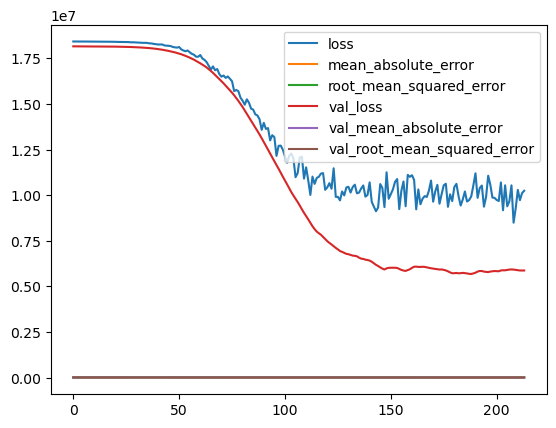

In [58]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [59]:
# loss = model.history.history['loss']
# sns.lineplot(x=range(len(loss)),y=loss)
# plt.title("Training Loss per Epoch");

In [60]:
model.metrics_names

['loss', 'mean_absolute_error', 'root_mean_squared_error']

In [61]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [62]:
training_score

[5692445.5, 2317.305419921875, 2385.884521484375]

In [63]:
test_score

[5868790.5, 2363.835693359375, 2422.55859375]

In [64]:
test_predictions = model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(test_predictions.shape[0],))

4/4 [==============================] - 0s 834us/step


In [65]:
test_predictions

0     2154.168701
1     2429.170898
2     1637.083984
3     2481.011963
4     1835.869995
         ...     
95    1517.433105
96    1190.876343
97    1757.125000
98    2074.335205
99    1961.124023
Length: 100, dtype: float32

In [66]:
pred_df = pd.DataFrame(y_test).reset_index(drop = True)
pred_df['Model_Predictions'] = test_predictions
pred_df.columns = ['Test_Y','Model_Predictions']

In [67]:
pred_df

,Test_Y,Model_Predictions
0,5100.0,2154.168701
1,5700.0,2429.170898
2,3475.0,1637.083984
3,5400.0,2481.011963
4,4050.0,1835.869995
...,...,...
95,3000.0,1517.433105
96,3150.0,1190.876343
97,3500.0,1757.125000
98,3900.0,2074.335205


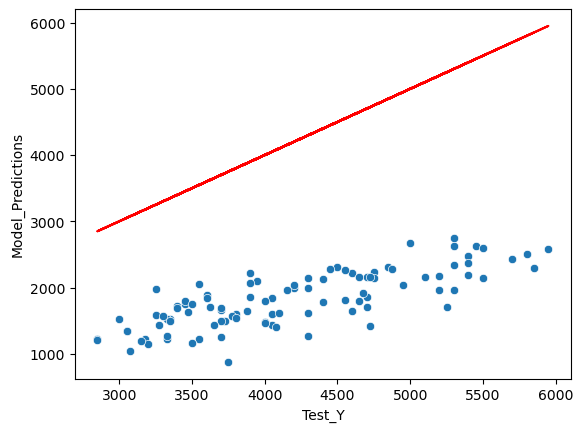

In [68]:
sns.scatterplot(x='Test_Y',y='Model_Predictions',data=pred_df)
plt.plot(y_test,y_test,'r')

In [69]:
pred_df['Error'] = pred_df['Test_Y'] - pred_df['Model_Predictions']

C:\Users\andre\AppData\Local\Temp\ipykernel_2104\1928191693.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_df['Error'],bins=50);


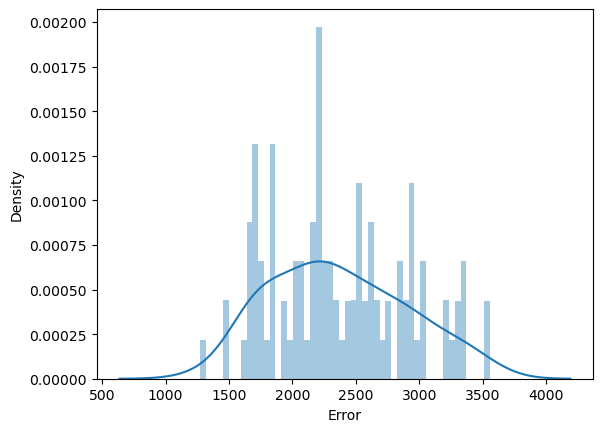

In [70]:
sns.distplot(pred_df['Error'],bins=50);

In [71]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(pred_df["Test_Y"],pred_df["Model_Predictions"])}')
print(f'Mean Squared Error: {metrics.mean_squared_error(pred_df["Test_Y"],pred_df["Model_Predictions"])}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(pred_df["Test_Y"],pred_df["Model_Predictions"]))}')

Mean Absolute Error: 2363.835621948242
Mean Squared Error: 5868790.040653612
Root Mean Squared Error: 2422.5585732141985


In [72]:
np.sqrt(metrics.mean_squared_error(pred_df["Test_Y"],pred_df["Model_Predictions"]))/pred_df["Test_Y"].mean()

0.5784523813787484

In [73]:
metrics.explained_variance_score(pred_df["Test_Y"],pred_df["Model_Predictions"])

0.5474119761136247

## Saving and Loading a Model

In [74]:
# from tensorflow.keras.models import load_model

In [75]:
# model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [76]:
# later_model = load_model('my_model.h5')